# **PROJET : CLASSIFICATION DE DISCOURS POLITIQUES**

# **POUR COMMENCER**

**CONNEXION DE DRIVE A GOOGLE COLAB**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**INSTALLATION DE SPARK ET SPARK NLP**

In [ ]:
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash /dev/stdin -p 3.1.2 -s 3.4.2

--2023-12-04 19:24:18--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2023-12-04 19:24:19--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1191 (1.2K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing PySpark 3.1.3 and Spark NLP 3.4.2
setup Colab for PySpark 3.1.3 an

In [ ]:
# SESSION SPARK NLP
import sparknlp
spark = sparknlp.start()


In [ ]:
print("Spark NLP version: {}".format(sparknlp.version()))
print("Apache Spark version: {}".format(spark.version))

Spark NLP version: 3.4.2
Apache Spark version: 3.1.3


# **IMPORTATION ET EXPLMORATION DES DONNEES.**

# **I IMPORTATION DES DONNEES.**

# I-1 IMPORTATION DES DONNEES DANS GOOGLE COLAB

#### **Les discours démocrates.**

In [ ]:
df_demo= spark.read.text("/content/drive/MyDrive/Democrate/")

In [ ]:
df_demo.show(5)

+--------------------+
|               value|
+--------------------+
|The civil rights ...|
|And I know a lot ...|
|Good evening ever...|
|That I am here to...|
|Quiet that sparks...|
+--------------------+
only showing top 5 rows



Nombre de discours

In [ ]:
df_demo.count()

21

*Il y a 21 discours démocrates.*

#### **Les discours républicains.**

In [ ]:
df_rep= spark.read.text("/content/drive/MyDrive/republicain/")

In [ ]:
df_rep.show(5)

+--------------------+
|               value|
+--------------------+
|Thank you very mu...|
|Thank you very mu...|
|Good evening, Ame...|
|Good evening. It ...|
|Good evening. Bef...|
+--------------------+
only showing top 5 rows



Nombre de discours républicains.

In [ ]:
df_rep.count()

30

*Il y a 30 discours républicains.*

# I-2. AJOUT DES ETIQUETTES AUX DONNEES.

In [ ]:
# DEMOCRATES-AJOUT DES ETIQUETTES ET DE LA COLONNE ETIQUETTES
from pyspark.sql.functions import lit
df_demo = df_demo.withColumn("Etiquettes", lit("Dem"))


In [ ]:
df_demo.show(5)

+--------------------+----------+
|               value|Etiquettes|
+--------------------+----------+
|The civil rights ...|       Dem|
|And I know a lot ...|       Dem|
|Good evening ever...|       Dem|
|That I am here to...|       Dem|
|Quiet that sparks...|       Dem|
+--------------------+----------+
only showing top 5 rows



In [ ]:
# DEMOCRATE RENOMMER LA COLONNE VALUE EN DISCOURS
Df1_demo = df_demo.withColumnRenamed("value","Discours").withColumn("Etiquettes", lit("Dem"))
Df1_demo.show(5)

+--------------------+----------+
|            Discours|Etiquettes|
+--------------------+----------+
|The civil rights ...|       Dem|
|And I know a lot ...|       Dem|
|Good evening ever...|       Dem|
|That I am here to...|       Dem|
|Quiet that sparks...|       Dem|
+--------------------+----------+
only showing top 5 rows



In [ ]:
# REPUBLICAIN
Df1_rep = df_rep.withColumnRenamed("value","Discours").withColumn("Etiquettes", lit("rep"))
Df1_rep.show(5)

+--------------------+----------+
|            Discours|Etiquettes|
+--------------------+----------+
|Thank you very mu...|       rep|
|Thank you very mu...|       rep|
|Good evening, Ame...|       rep|
|Good evening. It ...|       rep|
|Good evening. Bef...|       rep|
+--------------------+----------+
only showing top 5 rows



# I-3. FORMATION DE LA BASE DE DONNEES

In [ ]:
# MISE EN COMMUN DES DONNEES
Df = Df1_rep.union(Df1_demo)
Df.show()

+--------------------+----------+
|            Discours|Etiquettes|
+--------------------+----------+
|Thank you very mu...|       rep|
|Thank you very mu...|       rep|
|Good evening, Ame...|       rep|
|Good evening. It ...|       rep|
|Good evening. Bef...|       rep|
|Good evening Amer...|       rep|
|Good evening Amer...|       rep|
|I'm Ben Carson, a...|       rep|
|Good evening. I'm...|       rep|
|Sister to Kyle, m...|       rep|
|Good evening. I'm...|       rep|
|I'm Tiffany Trump...|       rep|
|Hey everyone. I a...|       rep|
|Good evening. My ...|       rep|
|Good evening, Ame...|       rep|
|100 years ago tod...|       rep|
|I'm Pam Bondi. Ou...|       rep|
|Good evening, eve...|       rep|
|Good evening, I'm...|       rep|
|I'm Jack Brewer, ...|       rep|
+--------------------+----------+
only showing top 20 rows



In [ ]:
# MELANGE DES DONNEES
import pyspark.sql.functions as F
DF = Df.select("*").orderBy(F.rand())
DF.show(5)

+--------------------+----------+
|            Discours|Etiquettes|
+--------------------+----------+
|Well, I confess t...|       Dem|
|I'm Pam Bondi. Ou...|       rep|
|Good evening. I'm...|       rep|
|I'm Ben Carson, a...|       rep|
|It is a pleasure,...|       rep|
+--------------------+----------+
only showing top 5 rows



# II. **EXPLORATION GENERALE DE LA BASE DE DONNEES**

Nous allons réaliser des statistiques descriptives et faire quelques visualisations sur nos données.

#### ***Effectif total.***

In [ ]:
DF.count()

51

#### **Nombre de discours par parti politique.**

In [ ]:
DF.groupBy("Etiquettes").agg(F.count("Etiquettes")).show()

+----------+-----------------+
|Etiquettes|count(Etiquettes)|
+----------+-----------------+
|       Dem|               21|
|       rep|               30|
+----------+-----------------+



#### ***Proportion de discours par parti politique.***

Cette partie est réalisée sous pandas sur l'ensemble de toute la base de données.

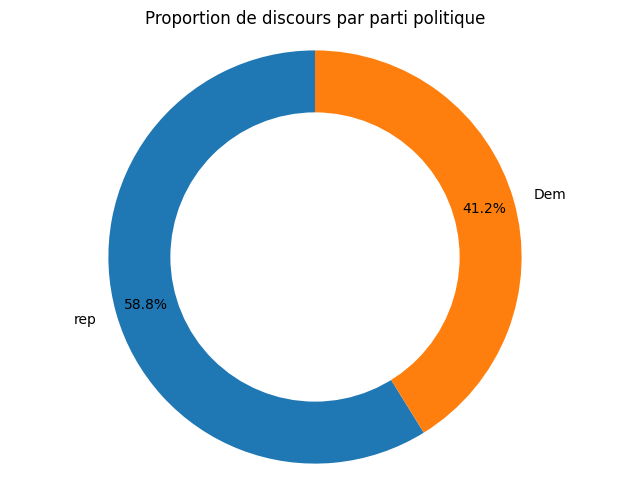

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pandasDF = DF.toPandas()
labels = ['rep','Dem']

sizes = [len(pandasDF[pandasDF.Etiquettes == "rep"]),len(pandasDF[pandasDF.Etiquettes == "Dem"])]
fig, ax1 = plt.subplots()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.title("Proportion de discours par parti politique")
plt.show()

[Text(0, 0, '30')]

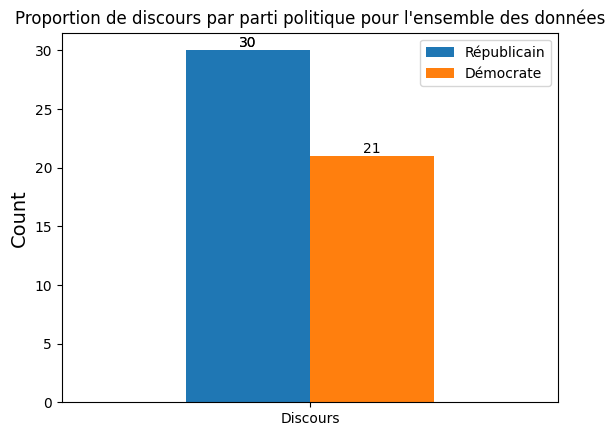

In [ ]:
Républicain = len(pandasDF[pandasDF.Etiquettes == "rep"])
Démocrate = len(pandasDF[pandasDF.Etiquettes == "Dem"])
index = ['Discours']
df = pd.DataFrame({'Républicain': Républicain,'Démocrate': Démocrate}, index=index)

ax = df.plot.bar(rot=0, title = "Proportion de discours par parti politique pour l'ensemble des données")
ax.set_ylabel("Count", size = 14)

# Annotation des bars
for container in ax.containers:
    ax.bar_label(container)
ax.bar_label(ax.containers[0])

**Il y a 58.8% de discours réoublicains et 41.2% de discours démocrates.**

**On constate que les données sont déséquilibrées. Néanmoins le déséquilibre n'est pas critique.**

#### **La longueur des discours.**

In [ ]:
from pyspark.sql.functions import length

# Ajout d'une colonne longueur des étiquettes
DF_length = DF.withColumn('length',length(DF['Discours']))

# Longueur minimale des discours par type de discours
print("Le discours le moins long, par type de discours:")
DF_length.select('Etiquettes','Discours','length').groupby('Etiquettes').min().show()
# Longueur maximale des discours par type de discours
print("Le discours le plus long, par type de discours:")
DF_length.select('Etiquettes','Discours','length').groupby('Etiquettes').max().show()
# Longueur moyenne par type de discours
print("Longueur moyenne de discours, par type de discours:")
DF_length.select('Etiquettes','Discours','length').groupby('Etiquettes').mean().show()



Le discours le moins long, par type de discours:
+----------+-----------+
|Etiquettes|min(length)|
+----------+-----------+
|       Dem|        616|
|       rep|       1228|
+----------+-----------+

Le discours le plus long, par type de discours:
+----------+-----------+
|Etiquettes|max(length)|
+----------+-----------+
|       Dem|      17359|
|       rep|      45829|
+----------+-----------+

Longueur moyenne de discours, par type de discours:
+----------+-----------------+
|Etiquettes|      avg(length)|
+----------+-----------------+
|       Dem|           5281.0|
|       rep|8408.533333333333|
+----------+-----------------+



***On remarque que les discours républicains sont plus longs.***

# **III. PREPARATION DES DONNEES.**

# III-1. DECOUPAGE DES DONNEES EN TRAIN ET TEST




Selon les consignes, nous découpons les données en 50% de train et 50% de test.

In [ ]:
import random
seed = 108
df_train, df_test = DF.randomSplit([0.5,0.5], seed =seed)

In [ ]:
df_train.show(5)

+--------------------+----------+
|            Discours|Etiquettes|
+--------------------+----------+
|Good evening, Ame...|       rep|
|Good evening. I'm...|       rep|
|Good evening. My ...|       rep|
|Hey everyone. I a...|       rep|
|I'm Ben Carson, a...|       rep|
+--------------------+----------+
only showing top 5 rows



In [ ]:
df_train.count()

26

In [ ]:
df_test.show(5)

+--------------------+----------+
|            Discours|Etiquettes|
+--------------------+----------+
|Good evening Amer...|       rep|
|Good evening Amer...|       rep|
|Good evening, Ame...|       rep|
|Good evening. Bef...|       rep|
|Good evening. I'm...|       rep|
+--------------------+----------+
only showing top 5 rows



In [ ]:
df_test.count()

25

Nous obtenons 29 discours pour les données d'entrainement et 19 pour les données de test.

# III-2 DESCRIPTION DES DONNEES TRAIN ET TEST.

#### **Nombre des discours par parti politique.**

In [ ]:
# DONNEES TRAIN
df_train.groupBy("Etiquettes").agg(F.count("Etiquettes")).show()

+----------+-----------------+
|Etiquettes|count(Etiquettes)|
+----------+-----------------+
|       Dem|               11|
|       rep|               15|
+----------+-----------------+



In [ ]:
# DONNEES DE TEST
df_test.groupBy("Etiquettes").agg(F.count("Etiquettes")).show()

+----------+-----------------+
|Etiquettes|count(Etiquettes)|
+----------+-----------------+
|       Dem|               10|
|       rep|               15|
+----------+-----------------+



#### ***Proportion de discours par parti politique.***

Cette partie est réalisée sous pandas sur l'ensemble des données d'entrainement.

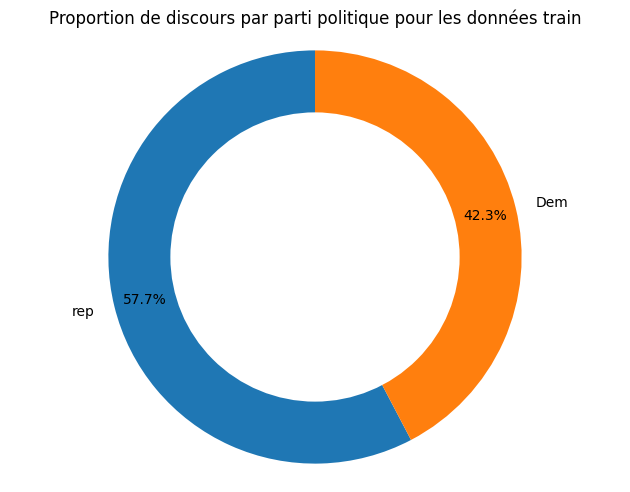

In [ ]:
# DONNEES TRAIN

import matplotlib.pyplot as plt
import pandas as pd
pandasdf_train = df_train.toPandas()
labels = ['rep','Dem']

sizes = [len(pandasdf_train[pandasdf_train.Etiquettes == "rep"]),len(pandasdf_train[pandasdf_train.Etiquettes == "Dem"])]
fig2, ax2 = plt.subplots()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)
ax2.axis('equal')
plt.tight_layout()
plt.title("Proportion de discours par parti politique pour les données train")
plt.show()

[Text(0, 0, '15')]

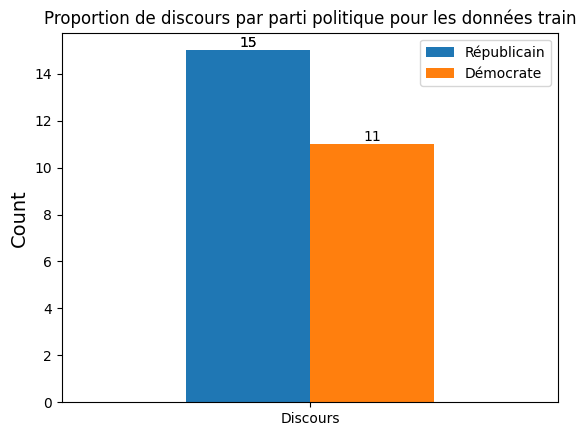

In [ ]:
Républicain = len(pandasdf_train[pandasdf_train.Etiquettes == "rep"])
Démocrate = len(pandasdf_train[pandasdf_train.Etiquettes == "Dem"])
index = ['Discours']
df = pd.DataFrame({'Républicain': Républicain,'Démocrate': Démocrate}, index=index)

ax = df.plot.bar(rot=0, title = "Proportion de discours par parti politique pour les données train")
ax.set_ylabel("Count", size = 14)

# Annotation des bars
for container in ax.containers:
    ax.bar_label(container)
ax.bar_label(ax.containers[0])

Cette partie est réalisée sous pandas sur l'ensemble des données de test.

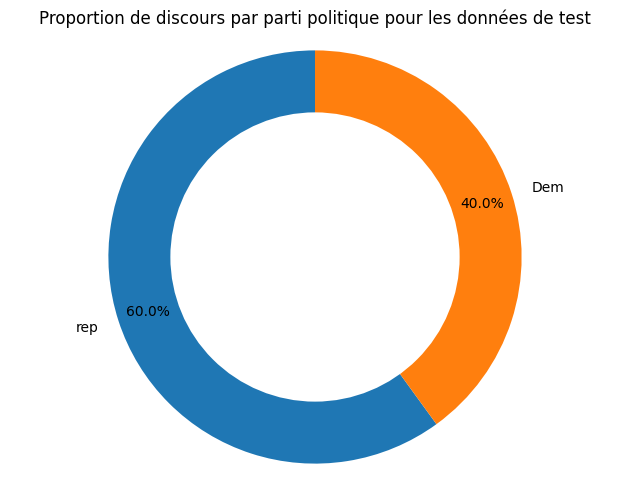

In [ ]:
# DONNEES DE TEST

import matplotlib.pyplot as plt
import pandas as pd
pandasdf_test = df_test.toPandas()
labels = ['rep','Dem']

sizes = [len(pandasdf_test[pandasdf_test.Etiquettes == "rep"]),len(pandasdf_test[pandasdf_test.Etiquettes == "Dem"])]
fig2, ax2 = plt.subplots()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)
ax2.axis('equal')
plt.tight_layout()
plt.title("Proportion de discours par parti politique pour les données de test")
plt.show()

[Text(0, 0, '15')]

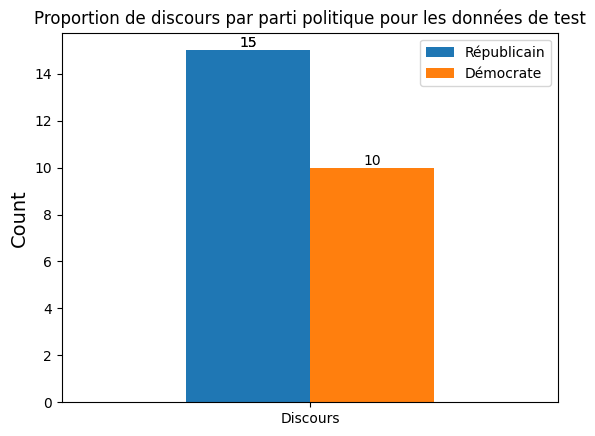

In [ ]:
Républicain = len(pandasdf_test[pandasdf_test.Etiquettes == "rep"])
Démocrate = len(pandasdf_test[pandasdf_test.Etiquettes == "Dem"])
index = ['Discours']
df = pd.DataFrame({'Républicain': Républicain,'Démocrate': Démocrate}, index=index)
#####

ax = df.plot.bar(rot=0, title = "Proportion de discours par parti politique pour les données de test")
ax.set_ylabel("Count", size = 14)
# Annotation des bars
for container in ax.containers:
    ax.bar_label(container)
ax.bar_label(ax.containers[0])



ON CONSTATE QUE LES DONNEES D'ENTRAINEMENT ET DE TEST SONT PLUS OU MOINS DESEQUILIBREES. NEANMOINS LE DESEQUILIBRE N'EST PAS AIGU.

# III-3. PRETRAITEMENT DES DONNEES.

# *Nous équilibrons les données train en augmentant le nombre de discours minorotaires, donc démocrates.*

#### **Equilibre des données train**

In [ ]:
import warnings

get_ipython().magic('matplotlib inline')


count_class_rep, count_class_dem = pandasdf_train.Etiquettes.value_counts()

# Partage par classe
df_class_rep = pandasdf_train[pandasdf_train['Etiquettes'] == 'rep'] # class majoritaire
df_class_dem = pandasdf_train[pandasdf_train['Etiquettes'] == 'Dem'] # class minoritaire

df_class_dem_over = df_class_dem.sample(count_class_rep, replace=True)
df_train = pd.concat([df_class_rep, df_class_dem_over], axis=0)

print('Equilibre des données par augmentation:')
print(df_train.Etiquettes.value_counts())



Equilibre des données par augmentation:
rep    15
Dem    15
Name: Etiquettes, dtype: int64


[Text(0, 0, '15')]

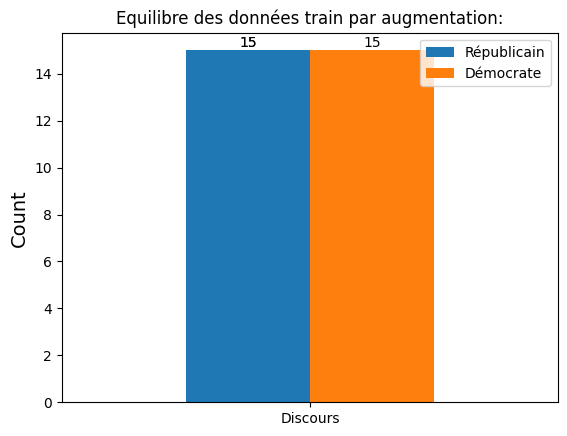

In [ ]:
Républicain = len(df_train[df_train.Etiquettes == "rep"])
Démocrate = len(df_train[df_train.Etiquettes == "Dem"])
index = ['Discours']
df = pd.DataFrame({'Républicain': Républicain,'Démocrate': Démocrate}, index=index)
#####

ax = df.plot.bar(rot=0, title = "Equilibre des données train par augmentation:")
ax.set_ylabel("Count", size = 14)
# Annotation des bars
for container in ax.containers:
    ax.bar_label(container)
ax.bar_label(ax.containers[0])

# **Convertir les données  en SparkDataFrame**

In [ ]:
# DONNEES TRAIN
train_e = spark.createDataFrame(df_train)
train_e.printSchema()
train_e.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


root
 |-- Discours: string (nullable = true)
 |-- Etiquettes: string (nullable = true)

+--------------------+----------+
|            Discours|Etiquettes|
+--------------------+----------+
|Good evening, Ame...|       rep|
|Good evening. I'm...|       rep|
|Good evening. My ...|       rep|
|Hey everyone. I a...|       rep|
|I'm Ben Carson, a...|       rep|
|I'm Tiffany Trump...|       rep|
|Thank you very mu...|       rep|
|Thank you very mu...|       rep|
|100 years ago tod...|       rep|
|Good evening, I'm...|       rep|
|Good evening. I'm...|       rep|
|Hi. I'm Congressm...|       rep|
|I'm Jack Brewer, ...|       rep|
|I'm speaking to y...|       rep|
|It is a pleasure,...|       rep|
|We have a leader ...|       Dem|
|Tonight, we've he...|       Dem|
|We have a leader ...|       Dem|
|The civil rights ...|       Dem|
|America is at a c...|       Dem|
+--------------------+----------+
only showing top 20 rows



In [ ]:
# Mélange des données
DFtrain = train_e.select("*").orderBy(F.rand())
DFtrain.show()

+--------------------+----------+
|            Discours|Etiquettes|
+--------------------+----------+
|Well, I confess t...|       Dem|
|We have a leader ...|       Dem|
|Union job lifted ...|       Dem|
|Hey everyone. I a...|       rep|
|Good evening, Ame...|       rep|
|Tonight, we've he...|       Dem|
|Thank you very mu...|       rep|
|Hi. I'm Congressm...|       rep|
|Brooklyn, New Yor...|       Dem|
|It is a pleasure,...|       rep|
|Good evening. Bea...|       Dem|
|Good evening. I'm...|       rep|
|100 years ago tod...|       rep|
|I'm Tiffany Trump...|       rep|
|I'm Jack Brewer, ...|       rep|
|I'm speaking to y...|       rep|
|I'm Ben Carson, a...|       rep|
|Tonight, we've he...|       Dem|
|Thank you very mu...|       rep|
|Good evening. My ...|       rep|
+--------------------+----------+
only showing top 20 rows



In [ ]:
# DONNEES TEST

# Mélange
DFtest = df_test.select("*").orderBy(F.rand())
DFtest.show()


+--------------------+----------+
|            Discours|Etiquettes|
+--------------------+----------+
|Good evening Amer...|       rep|
|Hello, America. I...|       Dem|
|That I am here to...|       Dem|
|I've supported De...|       Dem|
|Good evening. Bef...|       rep|
|Quiet that sparks...|       Dem|
|I'm not an actor,...|       rep|
|Good evening. I'm...|       rep|
|Good evening, Ame...|       rep|
|Hundred years ago...|       rep|
|Good evening. It ...|       rep|
|Sister to Kyle, m...|       rep|
|Good evening. Our...|       Dem|
|Good evening, eve...|       rep|
|I'm Pam Bondi. Ou...|       rep|
|Good evening Amer...|       rep|
|Good evening ever...|       Dem|
|Greetings. My nam...|       rep|
|I'm Kayleigh McEn...|       rep|
|Hi, I'm former se...|       Dem|
+--------------------+----------+
only showing top 20 rows



**Construction du Pipeline**

# Nous utiliserons une liste de mots vides prédéfinis,la liste des mots vides NLTK. De plus, comme les discours sont relativement longs, nous utileserons l'encodage TF - IDF.  

In [ ]:
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, IDF, StringIndexer, SQLTransformer,IndexToString
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
eng_stopwords = stopwords.words('english')


# Les étapes du pipeline
document_assembler = DocumentAssembler() \
.setInputCol("Discours") \
.setOutputCol("document")

tokenizer = Tokenizer() \
.setInputCols(["document"]) \
.setOutputCol("token")

normalizer = Normalizer() \
.setInputCols(['token']) \
.setOutputCol('normalized') \
.setLowercase(True)

stemmer = Stemmer() \
.setInputCols(["normalized"]) \
.setOutputCol("stem")

stopwords_cleaner = StopWordsCleaner()\
.setInputCols("stem")\
.setOutputCol("cleanTokens")\
.setStopWords(eng_stopwords)

finisher = Finisher() \
.setInputCols(["cleanTokens"]) \
.setOutputCols(["finished"]) \
.setOutputAsArray(True) \
.setCleanAnnotations(False)

hashingTF = HashingTF(inputCol="finished", outputCol="rawFeatures", numFeatures=1000)

idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=5)

label_stringIdx = StringIndexer(inputCol = "Etiquettes", outputCol = "label")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from pyspark.ml import Pipeline
# Pipeline
my_pipeline = Pipeline(stages=[
                             document_assembler,
                             tokenizer,
                             normalizer,
                             stemmer,
                             stopwords_cleaner,
                             finisher,
                             hashingTF,
                             idf,
                             label_stringIdx
])

#### **Application du pipeline aux données**


In [ ]:
# DONNEES TRAIN EQUILIBREES
trai_eq = my_pipeline.fit(DFtrain)
DFtrain_eq = trai_eq .transform(DFtrain)

# DONNEES TEST EQUILIBREES

tes_eq = my_pipeline.fit(DFtest)
DFtest_eq = tes_eq.transform(DFtest)


In [ ]:
# VISUALISATION

print("Les données d'entrainement :")
DFtrain_eq.show(5)
print("Les données de test:")
DFtest_eq.show(5)

Les données d'entrainement :
+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|            Discours|Etiquettes|            document|               token|          normalized|                stem|         cleanTokens|            finished|         rawFeatures|            features|label|
+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|Well, I confess t...|       Dem|[{document, 0, 24...|[{token, 0, 3, We...|[{token, 0, 3, we...|[{token, 0, 3, we...|[{token, 0, 3, we...|[well, confess, t...|(1000,[1,7,16,21,...|(1000,[1,7,16,21,...|  0.0|
|We have a leader ...|       Dem|[{document, 0, 42...|[{token, 0, 1, We...|[{token, 0, 1, we...|[{token, 0, 1, we...|[{token, 10, 15, ...|[

# **IV. CONSTRUCTION DE MODELES DE CLASSIFICATION AUTOMATIQUE ET EVALUATION.**

# **Deux fonctions permettant de comparer les résultats de nos différentes méthodes.**

In [ ]:
import seaborn as sns
import sklearn
from sklearn.metrics import*
import numpy as np

def print_resultats(y_true,y_pred,mode='train'):

  print(f'================{mode.upper()}=================')
  print(classification_report(y_true, y_pred))
  print ("Accuracy : ",accuracy_score(y_true,y_pred))
  cm = confusion_matrix(y_true,y_pred)
  ROC = roc_auc_score(y_true,y_pred)
  print ("AUC : ",ROC)
  plt.figure(figsize=(12,10))
  sns.heatmap(cm/np.sum(cm), annot=True,
          fmt='.2%', cmap='Blues').set_title('Matrice de confusion')
  plt.show()

def model_report(y_true,y_pred) :

  accuracy     = accuracy_score(y_true,y_pred)
  recallscore  = recall_score(y_true,y_pred)
  precision    = precision_score(y_true,y_pred)
  roc_auc      = roc_auc_score(y_true,y_pred)
  f1score      = f1_score(y_true,y_pred)
  df = pd.DataFrame({ "Accuracy"  : [accuracy],
                    "Recall"    : [recallscore],
                    "Precision"       : [precision],
                    "F1_score"        : [f1score],
                    "AUC": [roc_auc],
                    })
  return df

# **Construction, évaluation et comparaison de nos modèles.**

# *Nous nous sommes servis des modèles de Regression logistique, des Arbres de décision et des forêts aléatoires.*

**Nous utiliserons ici la recherche de grille avec validation croisée pour rechercher de meilleures
valeurs de paramètres parmi celles fournies.**

In [ ]:

from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

modeldf = pd.DataFrame(columns = [ 'Accuracy', 'Recall', 'Precision', 'F1_score','AUC'])
preds = ['lr_features','dt_features','rf_features']



In [ ]:
# REGRESSION LOGISTIQUE

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10,predictionCol='lr_features')

paramGrid_lr = ParamGridBuilder() \
.addGrid(lr.regParam, np.linspace(0.3, 0.01, 10)) \
.addGrid(lr.elasticNetParam, np.linspace(0.3, 0.8, 6)) \
.build()

crossval_lr = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid_lr,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=5)

###############################################################################

# ARBRES DE DECISION

dt = DecisionTreeClassifier(featuresCol='features',labelCol='label',predictionCol='dt_features',seed=seed)

param_grid_dt = ParamGridBuilder().\
    addGrid(dt.maxDepth, [2,3,4,5]).\
    build()

crossval_dt = CrossValidator(estimator=dt,
                             estimatorParamMaps=param_grid_dt,
                             evaluator=BinaryClassificationEvaluator(),
                             numFolds=5)

###############################################################################

# FORETS ALEATOIRES

# Estimator
rf = RandomForestClassifier(featuresCol='features',labelCol='label',predictionCol='rf_features',seed=seed)

# Parameter grid
param_grid_rf = ParamGridBuilder().\
    addGrid(rf.maxDepth, [2, 3, 4]).\
    addGrid(rf.minInfoGain, [0.0, 0.1, 0.2, 0.3]).\
    build()

# Construction des modèles de validation croisée
crossval_rf = CrossValidator(estimator=rf,
                             estimatorParamMaps=param_grid_rf,
                             evaluator = BinaryClassificationEvaluator(),
                             numFolds=5)

In [ ]:
# Ajuster les modèles de validation croisée
cvModel_lr = crossval_lr.fit(DFtrain_eq)
cvModel_dt = crossval_dt.fit(DFtrain_eq)
cvModel_rf = crossval_rf.fit(DFtrain_eq)

In [ ]:
best_model_lr = cvModel_lr.bestModel
best_model_dt = cvModel_dt.bestModel
best_model_rf = cvModel_rf.bestModel

In [ ]:
# EVALUATION DES MODELES ET COMPARAISON
seed =42
models = [best_model_lr,best_model_dt,best_model_rf ]

for model,pred in zip(models,preds):
  print(model)

# Prédictions
  predictions_train = model.transform(DFtrain_eq)
  predictions_test = model.transform(DFtest_eq)

# Evaluations des modèles
  y_true = predictions_train.select(['label']).collect()
  y_true_test = predictions_test.select(['label']).collect()

  y_pred = predictions_train.select([pred]).collect()
  y_pred_test=predictions_test.select([pred]).collect()

  modeldf = pd.concat([modeldf,model_report(y_true,y_pred)])
  modeldf = pd.concat([modeldf,model_report(y_true_test,y_pred_test)])

modeldf['Modèles']=['RegLog_train','RegLog_test','DT_train','DT_test','RF_train','RF_test']
modeldf.set_index(['Modèles'])

LogisticRegressionModel: uid=LogisticRegression_3f13d8266109, numClasses=2, numFeatures=1000
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_3ea031f5a0b1, depth=2, numNodes=7, numClasses=2, numFeatures=1000
RandomForestClassificationModel: uid=RandomForestClassifier_b4afb828a9a6, numTrees=20, numClasses=2, numFeatures=1000


,Accuracy,Recall,Precision,F1_score,AUC
Modèles,,,,,
RegLog_train,1.00,1.0,1.000000,1.000000,1.000000
RegLog_test,0.24,0.1,0.090909,0.095238,0.216667
DT_train,1.00,1.0,1.000000,1.000000,1.000000
DT_test,0.56,0.4,0.444444,0.421053,0.533333
RF_train,1.00,1.0,1.000000,1.000000,1.000000
RF_test,0.28,0.3,0.214286,0.250000,0.283333


**Le model ayant les meilleures performanaces sur les données de test est la regression logistique.**

================TEST=================
              precision    recall  f1-score   support

         0.0       0.25      0.20      0.22        15
         1.0       0.08      0.10      0.09        10

    accuracy                           0.16        25
   macro avg       0.16      0.15      0.15        25
weighted avg       0.18      0.16      0.17        25

Accuracy :  0.16
AUC :  0.15


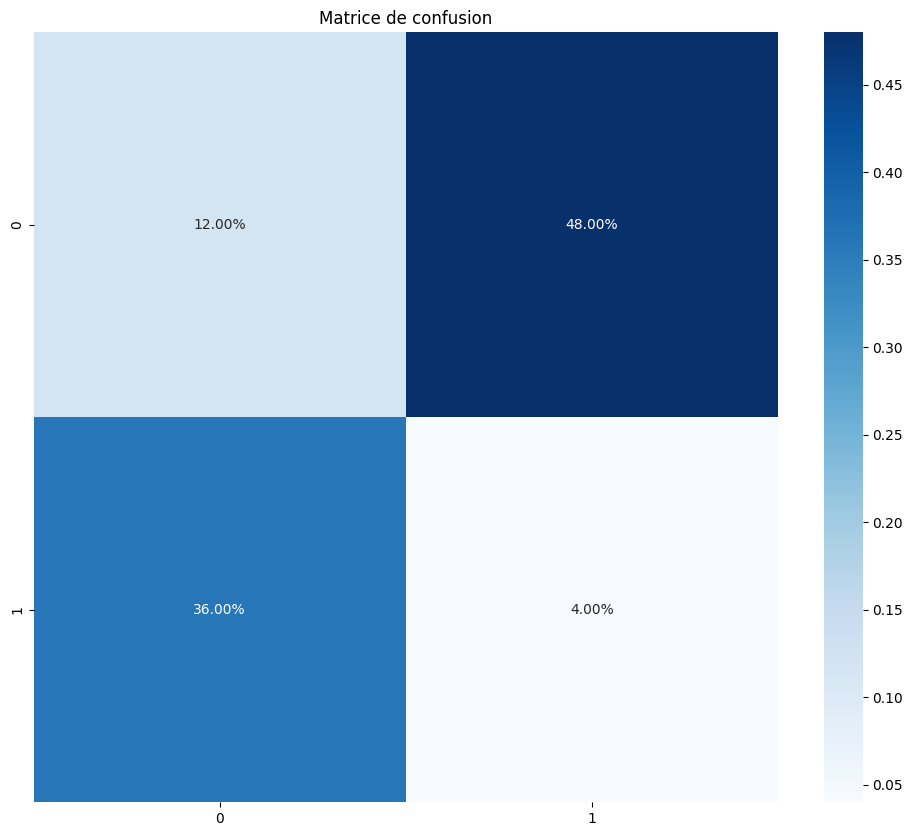

In [ ]:
# PREDICTION DES LABELS ET MATRICE DE CONFUSION

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=100,predictionCol='lr_features')
Model = lr.fit(DFtrain_eq)
predictions_test = Model.transform(DFtest_eq)
y_true = predictions_test.select(['label']).collect()
y_pred = predictions_test.select(['lr_features']).collect()
print_resultats(y_true,y_pred,mode='test')

**On remarque que le modele prédit avec environ le même taux chacune des classes.**